# 异常值处理

## 异常值相关概念

### 异常值定义和处理必要性
- **异常值（Outliers）**：与数据集中大多数数据显著不同的数据点。
- **处理必要性**：在数据分析中，识别和处理异常值非常重要，因为它们可能扭曲统计分析的结果，如平均值和标准差。

## 异常值处理两种方法

1. **3σ原则**
2. **箱型图**

### 关于3σ原则处理异常值

#### 正态分布和异常值
- **正态分布（Normal Distribution）**：数据呈钟形曲线分布，大多数数据点围绕平均值 $ μ $ 聚集。
- **异常值判定规则**：在正态分布中，位于 $ (μ-3σ, μ+3σ) $ 范围外的数据点通常被视为异常值。这个规则基于正态分布性质，即约 $ 99.73% $ 的数据应该落在这个区间内。

#### 适用与不适用场景
- **适用场景**：人口数据、测量误差、生产加工质量、考试成绩等，这些通常**符合正态分布**。
- **不适用场景**：如公交站排队人数等，这些可能**符合其他分布**（例如泊松分布）。

In [1]:
import numpy as np

# 示例数据
x = [1, 1.1, 1.2, 1.3, 1.4, 2, 1.2, 1.3, 1.5, 0.9, 0.8, 1.1, 11]

# 计算均值和标准差
average = np.mean(x)
standard_deviation = np.std(x)

# 判断异常值
inliers = [data for data in x if abs(data - average) < 3 * standard_deviation]
outliers = [data for data in x if abs(data - average) >= 3 * standard_deviation]

print("Inliers:", inliers)
print("Outliers:", outliers)

Inliers: [1, 1.1, 1.2, 1.3, 1.4, 2, 1.2, 1.3, 1.5, 0.9, 0.8, 1.1]
Outliers: [11]


### 关于箱型图处理异常值

#### 箱型图定义和用途
- **箱型图（Boxplot）**：一种用于显示数据分布的统计图表，尤其适用于显示数据的中位数、四分位数和异常值。

#### 箱型图关键组成部分
1. **四分位数（Quartiles）**：
   - **下四分位数（Q1）**：数据中排名第25%的数值。
   - **上四分位数（Q3）**：数据中排名第75%的数值。
2. **四分位距（IQR，Interquartile Range）**：$Q_3$ 与 $Q_1$ 的差，即 $ IQR = Q_3 - Q_1 $。
3. **异常值识别**：常用的规则是将 $ (Q_1 - 1.5 * IQR, Q_3 + 1.5 * IQR) $ 范围外的点视为异常值。

#### 箱型图的特点
- 中位数在箱体内部通过一条线表示。
- 箱体的边缘分别表示上下四分位数（$Q_3$ 和 $Q_1$）。
- 箱体外的“触须”（whiskers）延伸至非异常范围内的最大值和最小值。
- 超出触须的点被视为异常值。

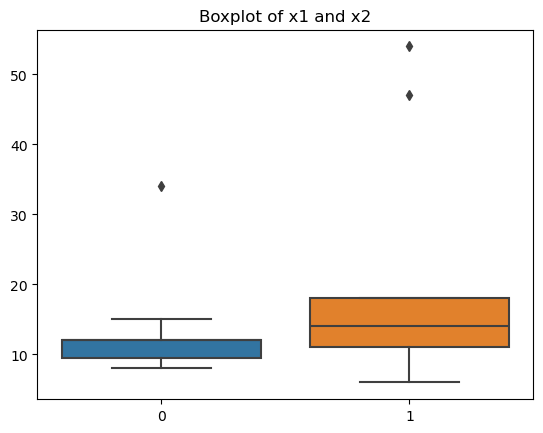

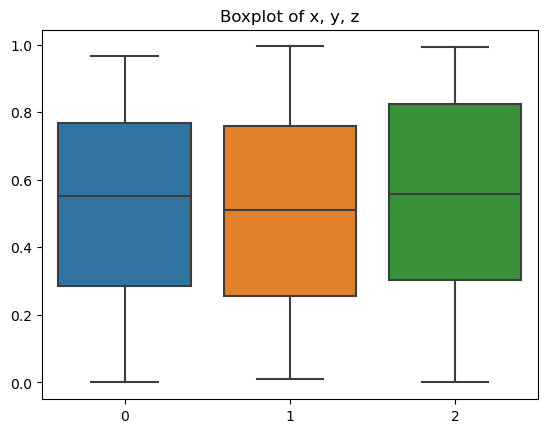

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 示例数据
x1 = [10, 12, 9, 8, 12, 11, 15, 12, 34, 12, 9]
x2 = [13, 14, 6, 9, 18, 16, 47, 18, 54, 13, 6]

# 生成随机数据
x = np.random.rand(50, 1)
y = np.random.rand(30, 1)
z = np.random.rand(55, 1)

# 绘制箱型图
plt.figure()
sns.boxplot(data=[x1, x2])
plt.title("Boxplot of x1 and x2")

plt.figure()
sns.boxplot(data=[x.flatten(), y.flatten(), z.flatten()])
plt.title("Boxplot of x, y, z")
plt.show()